In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# DataSet

In [ ]:
df = pd.read_csv('NFL_Grouped_Stats_Dataset_for_Model.csv')

In [ ]:
df.head()

,GameId,OffenseTeam,Score,PassingYards,RunningYards,PenaltyYards,Penalties,Turnovers,Win_Lose
0,2014090400,SEA,34,191,210,55,7,1,Win
1,2014090400,GB,18,210,80,79,5,2,Lose
2,2014090700,ATL,37,448,123,47,6,1,Win
3,2014090700,NO,34,333,139,76,7,2,Lose
4,2014090701,CIN,23,301,81,34,4,0,Win


# Describe the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3812 entries, 0 to 3811
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GameId        3812 non-null   int64 
 1   OffenseTeam   3812 non-null   object
 2   Score         3812 non-null   int64 
 3   PassingYards  3812 non-null   int64 
 4   RunningYards  3812 non-null   int64 
 5   PenaltyYards  3812 non-null   int64 
 6   Penalties     3812 non-null   int64 
 7   Turnovers     3812 non-null   int64 
 8   Win_Lose      3812 non-null   object
dtypes: int64(7), object(2)
memory usage: 268.2+ KB


In [ ]:
df.describe()

,GameId,Score,PassingYards,RunningYards,PenaltyYards,Penalties,Turnovers
count,3.812000e+03,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000,3812.000000
mean,2.017394e+09,23.537775,266.343652,112.520199,54.379853,6.537775,2.110441
std,2.190071e+06,10.038754,79.495764,51.257141,27.149894,2.843765,1.504346
min,2.014090e+09,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,2.015122e+09,17.000000,210.000000,76.750000,35.000000,4.000000,1.000000
50%,2.017120e+09,23.000000,263.000000,106.000000,51.000000,6.000000,2.000000
75%,2.019112e+09,30.000000,317.000000,141.000000,71.000000,8.000000,3.000000
max,2.021111e+09,63.000000,808.000000,404.000000,169.000000,19.000000,9.000000


In [ ]:
df_nfl_drop_columns = df.drop(columns=['GameId','OffenseTeam'])

# Drop Columns that don't matter

In [ ]:
df_nfl_drop_columns.head()

,Score,PassingYards,RunningYards,PenaltyYards,Penalties,Turnovers,Win_Lose
0,34,191,210,55,7,1,Win
1,18,210,80,79,5,2,Lose
2,37,448,123,47,6,1,Win
3,34,333,139,76,7,2,Lose
4,23,301,81,34,4,0,Win


# Split into Test and Train

In [ ]:
X, y = df_nfl_drop_columns.iloc[:,:-1],df_nfl_drop_columns.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create XGBoost Model

In [ ]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)

XGBClassifier()

In [ ]:
preds = xgb_cl.predict(X_test)

# Results

In [1]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, preds)

0.7732634338138925

## Feature Importance

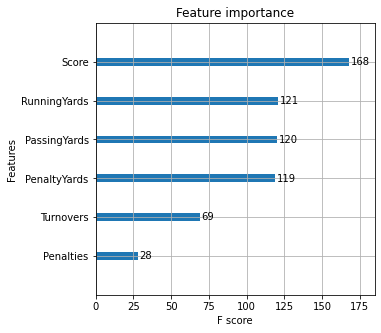

In [ ]:
xgb.plot_importance(xgb_cl)
#plt.rcParams['figure.figsize'] = [5,5]
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print( confusion_matrix(y_test,preds) )

[[285 107]
 [ 66 305]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print( classification_report(y_test,preds) )

              precision    recall  f1-score   support

        Lose       0.81      0.73      0.77       392
         Win       0.74      0.82      0.78       371

    accuracy                           0.77       763
   macro avg       0.78      0.77      0.77       763
weighted avg       0.78      0.77      0.77       763



## Remove Score and run model again

## Drop Column for Score

In [ ]:
nfl_no_score_df = df_nfl_drop_columns.drop(columns=['Score'])

In [ ]:
nfl_no_score_df.head()

,PassingYards,RunningYards,PenaltyYards,Penalties,Turnovers,Win_Lose
0,191,210,55,7,1,Win
1,210,80,79,5,2,Lose
2,448,123,47,6,1,Win
3,333,139,76,7,2,Lose
4,301,81,34,4,0,Win


## Split Test Train data without Score Column

In [ ]:
X, y = nfl_no_score_df.iloc[:,:-1],nfl_no_score_df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)

XGBClassifier()

In [ ]:
preds = xgb_cl.predict(X_test)

## Results without Score Column

In [ ]:
accuracy_score(y_test, preds)

0.727391874180865

## New Plot 

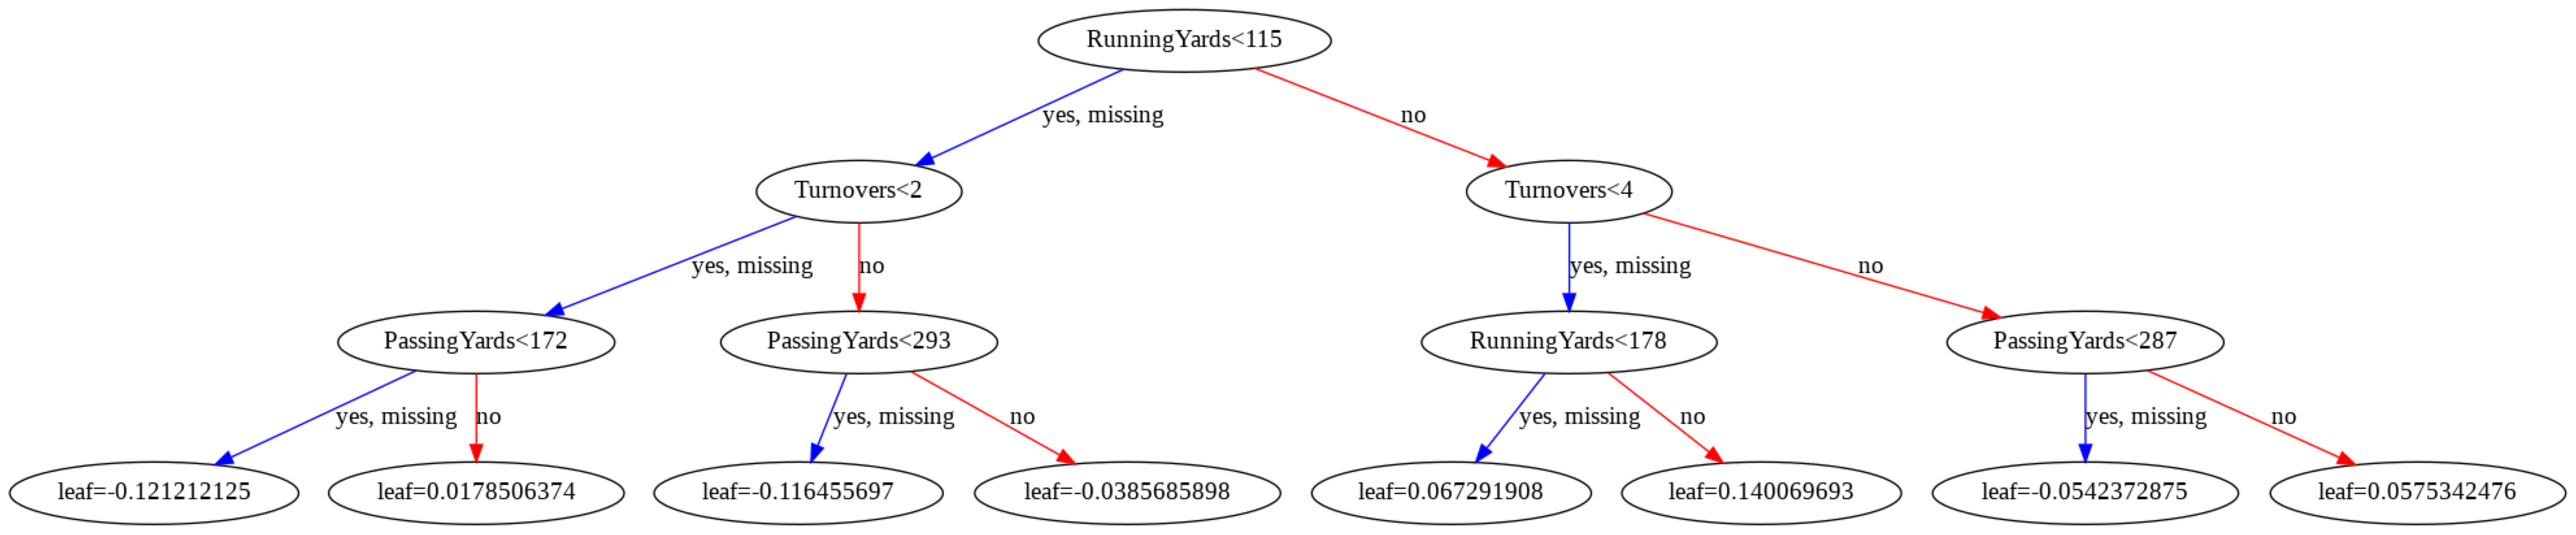

In [ ]:
xgb.plot_tree(xgb_cl,num_trees=0)
#plt.rcParams['figure.figsize'] = [100, 50]
plt.show()

## New Feature Importance without Score

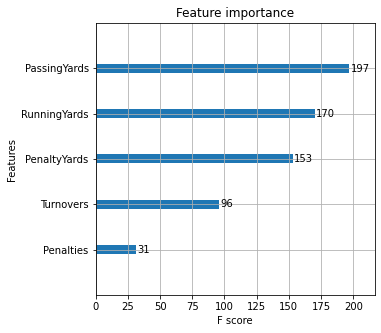

In [ ]:
xgb.plot_importance(xgb_cl)
#plt.rcParams['figure.figsize'] = [5,5]
plt.show()

In [ ]:
print( classification_report(y_test,preds) )

              precision    recall  f1-score   support

        Lose       0.76      0.68      0.72       392
         Win       0.70      0.78      0.73       371

    accuracy                           0.73       763
   macro avg       0.73      0.73      0.73       763
weighted avg       0.73      0.73      0.73       763

